### support vector machine (SVM) to classify images of cats and dogs

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pickle 
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from skimage.transform import resize
from skimage.io import imread

In [2]:
data =[]
dir = 'E:\ML intern\Task 3\dogs-vs-cats/train'
categories = ['cats','dogs']

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath =os.path.join(path, img)
        pet_img =cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(100,100), interpolation=cv2.INTER_CUBIC)
            Image = np.array(pet_img).flatten()
            data.append([Image,label])
        except Exception as e:
            'error'

print(len(data))

25000


In [22]:
# Fit model
random.shuffle(data)
featuers = []
labels=[]

for featuer,label in data:
    featuers.append(featuer)
    labels.append(label)

xtrain,xtest,ytrain,ytest = train_test_split(featuers,labels,test_size = .5,random_state=9)
# test size is bigger than normal because the big time running and device ability
model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain,ytrain)


SVC(C=1, gamma='auto', kernel='poly')

acc:  0.58816
pred is :  cats


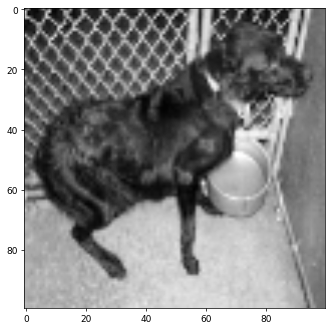

pred is :  cats


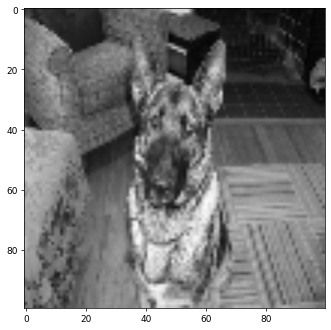

pred is :  cats


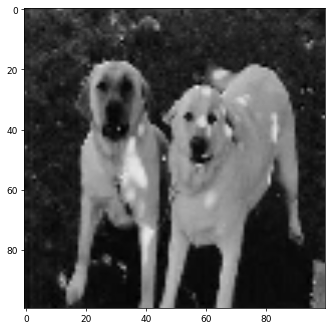

pred is :  cats


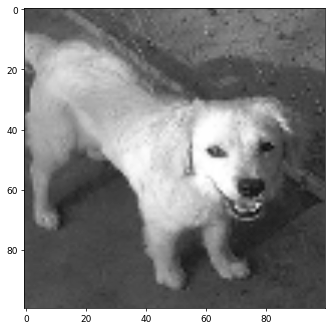

pred is :  cats


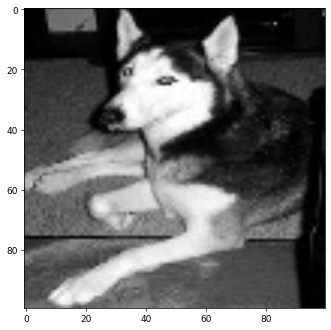

pred is :  dogs


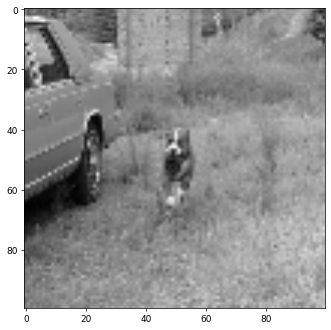

pred is :  cats


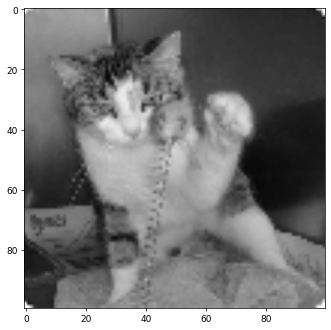

pred is :  dogs


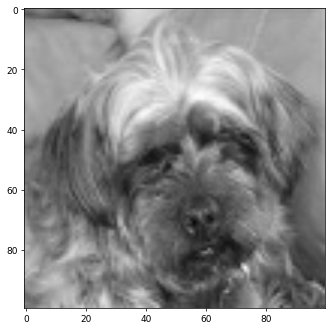

pred is :  cats


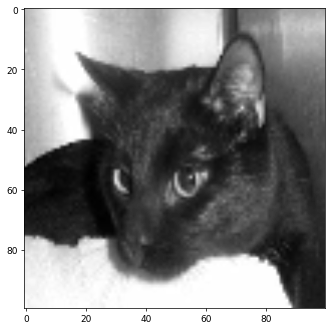

pred is :  cats


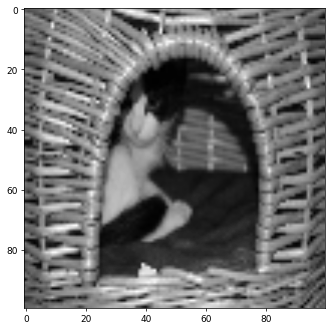

In [23]:
# Predict 
pred = model.predict(xtest)
accuracy = model.score(xtest,ytest)
categ = ['cats','dogs']
print('acc: ' ,accuracy)
# small train data will decrease the accuracy
for i in range(10):
    plt.figure(figsize=(8, 6), dpi=65)
    print('pred is : ',categ[pred[i]])
    mypet = xtest[i].reshape(100,100)
    plt.imshow(mypet,cmap='gray', interpolation='bilinear')
    plt.show()


In [24]:
test = []
pathT = 'E:\ML intern\Task 3\dogs-vs-cats\\test1'

for img in os.listdir(pathT):
    imgpath = os.path.join(pathT, img)
    pet_img = cv2.imread(imgpath)
    try:
        pet_img = cv2.resize(pet_img, (100,100), interpolation=cv2.INTER_CUBIC)
        pet_img_gray = cv2.cvtColor(pet_img, cv2.COLOR_BGR2GRAY)
        image_flat = pet_img_gray.flatten()
        test.append(image_flat)
    except Exception as e:
        print('Error:', e)

print(len(test))


12500


Prediction: dogs


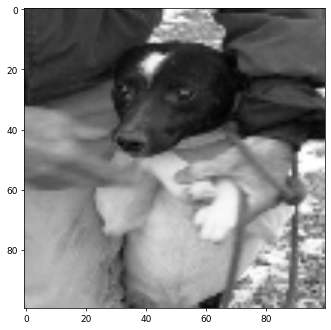

Prediction: cats


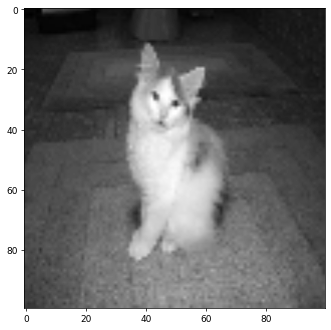

Prediction: dogs


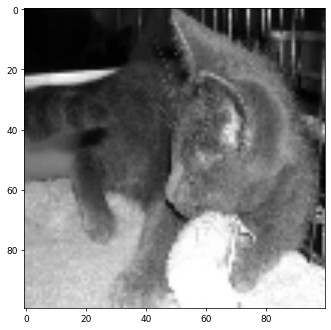

Prediction: cats


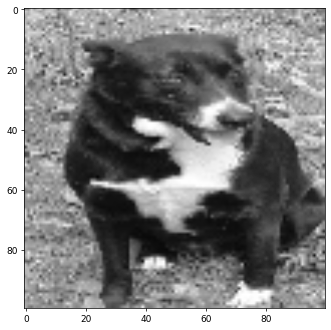

Prediction: cats


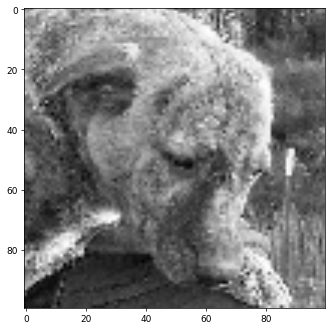

Prediction: cats


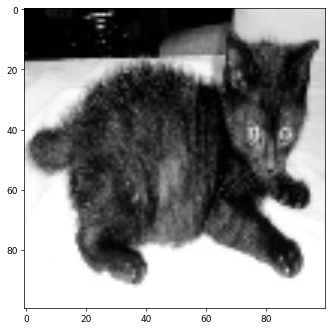

Prediction: cats


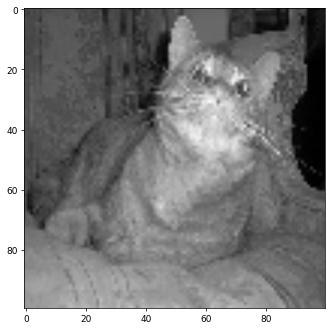

Prediction: dogs


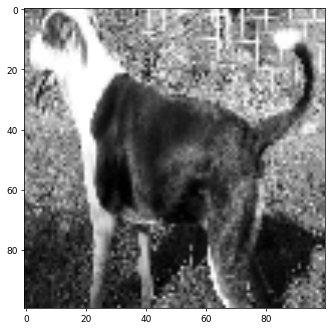

Prediction: cats


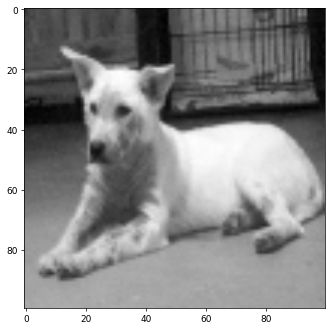

Prediction: dogs


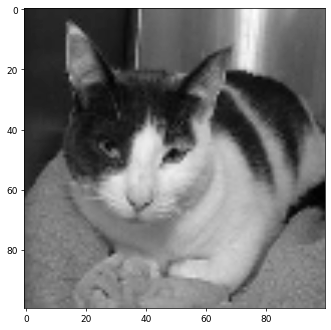

In [26]:
test = np.array(test)
pred = model.predict(test)
categ = ['cats', 'dogs']
for i in range(10):
    plt.figure(figsize=(8, 6), dpi=65)
    print('Prediction:', categ[pred[i]])
    mypet = test[i].reshape(100,100)  
    plt.imshow(mypet, cmap='gray', interpolation='bilinear')
    plt.show()


### The lack of good accuracy stems from the large size of data, which requires a long time to process.